<a href="https://colab.research.google.com/github/CarolineGuothesweetie/BA780-Lecture-Notes/blob/main/02_A_Brief_Overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Brief Overview
This notebook will do a quick overview of topics covered in this course

**References**
* Kaggle dataset: [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)
* [Comprehensive data exploration with Python](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)
* [Keras documentation](https://www.tensorflow.org/tutorials/keras/regression)

We will use the [House Prices dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) dataset from Kaggle to explore the functions and packages covered in this course. Some more info about this dataset can be found on Kaggle's website or [this metadata file](https://github.com/soltaniehha/Intro-to-Data-Analytics/blob/main/data/House-Prices-Kaggle/data_description.txt).

## Load packages and the dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

plt.style.use('seaborn-white')
df = pd.read_csv('https://raw.githubusercontent.com/soltaniehha/Intro-to-Data-Analytics/main/data/House-Prices-Kaggle/train.csv')
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [ ]:
df.shape

(1460, 81)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.isna().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

## Checking for missing values

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


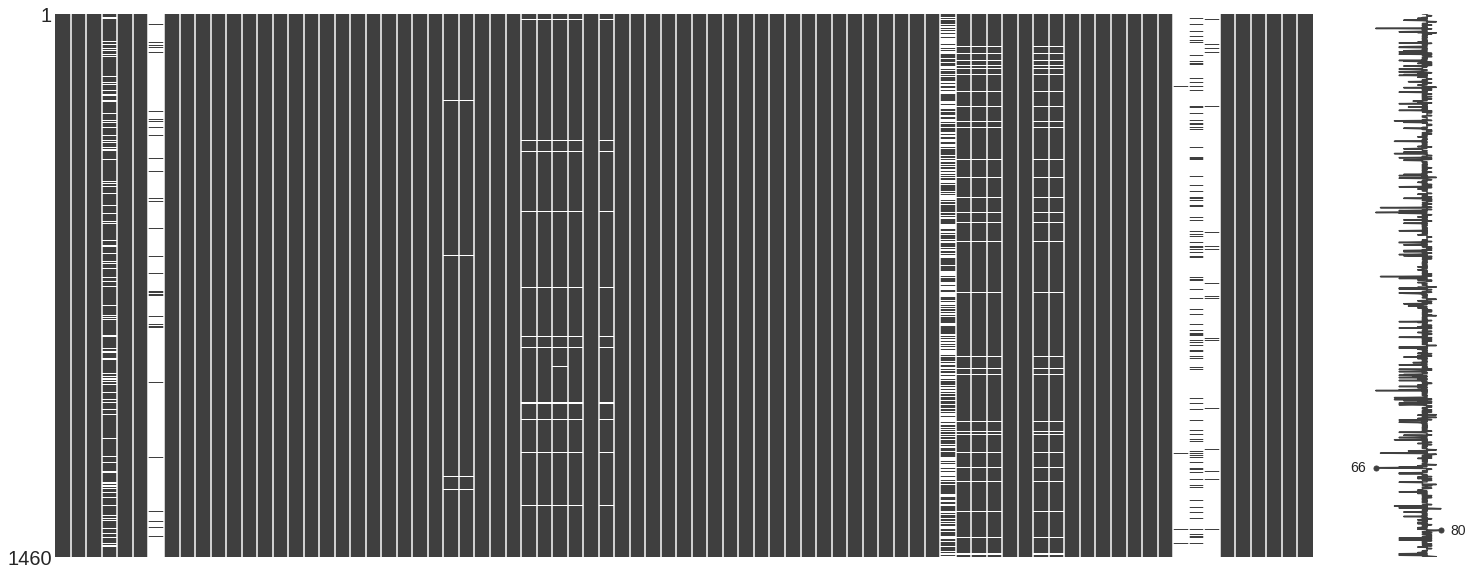

In [ ]:
msno.matrix(df);

dealing with missing data...

* These variables are mostly missing and even with imputation we can't add much information: `PoolQC`, `MiscFeature`, `Alley`
* `FireplaceQu` has too many missing values and we already have a variable called `Fireplaces` with the number of fireplaces. So, we will drop this one too.
* `LotFrontage` missing values aren't easily imputable.
* We have 5 variables related to garage. These result in NAs for 81 houses without a garage. We will drop them as well: `GarageType`, `GarageCond`, `GarageYrBlt`, `GarageFinish`, `GarageQual`
* We will remove the variables related to basement quality as well: `BsmtFinType2`, `BsmtExposure`, `BsmtFinType1`, `BsmtCond`, `BsmtQual`
* There is no useful information in the `Id` column.

We will drop them

In [ ]:
df.drop(['PoolQC', 'MiscFeature', 'Alley', 'FireplaceQu', 'LotFrontage', 'GarageType', 'GarageCond', 'GarageYrBlt', 
         'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'Id'], axis=1, inplace=True)

In [ ]:
# let's check Fence
df.groupby('Fence')['Fence'].count()

Fence
GdPrv     59
GdWo      54
MnPrv    157
MnWw      11
Name: Fence, dtype: int64

The rest is missing, meaning no fence. We will modify this to show fence: yes/no

In [ ]:
df.loc[df['Fence'].notnull(), 'Fence'] = 'Yes'
df.loc[df['Fence'].isnull(), 'Fence'] = 'No'

Handling `MasVnrArea`, `MasVnrType`, and `Electrical`

In [ ]:
df.loc[df['MasVnrArea'].isnull(), 'MasVnrArea'] = 0 # imputing missing values for MasVnrArea with 0
df.drop('MasVnrType', axis=1, inplace=True) # dropping MasVnrType
df.drop(df.loc[df['Electrical'].isnull()].index, axis=0, inplace=True) # dropping the one data point that has missing value in this column

In [ ]:
df.isnull().sum().max() #just checking that there's no missing data missing...

0

## Analyzing `SalePrice`
Now that we don't have any missing data in our dataframe let's do some exploration.

In [ ]:
#descriptive statistics summary
df['SalePrice'].describe()

count      1459.000000
mean     180930.394791
std       79468.964025
min       34900.000000
25%      129950.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

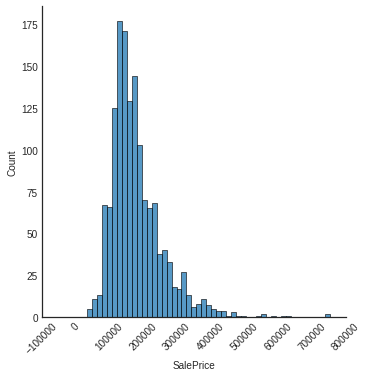

In [ ]:
#histogram
g = sns.displot(df['SalePrice'])
g.set_xticklabels(rotation=45);

Relationship with numerical variables

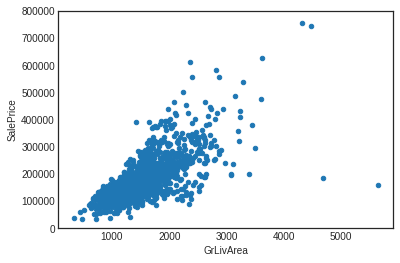

In [ ]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

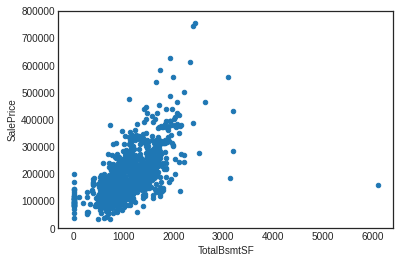

In [ ]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

Relationship with categorical features

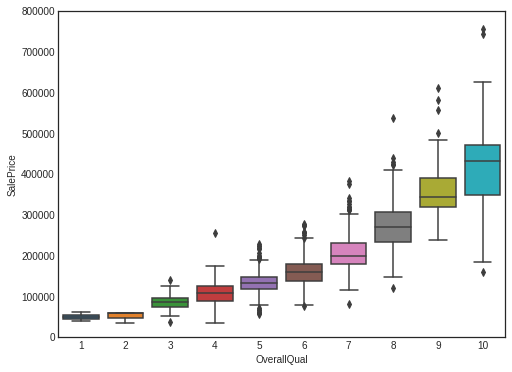

In [ ]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

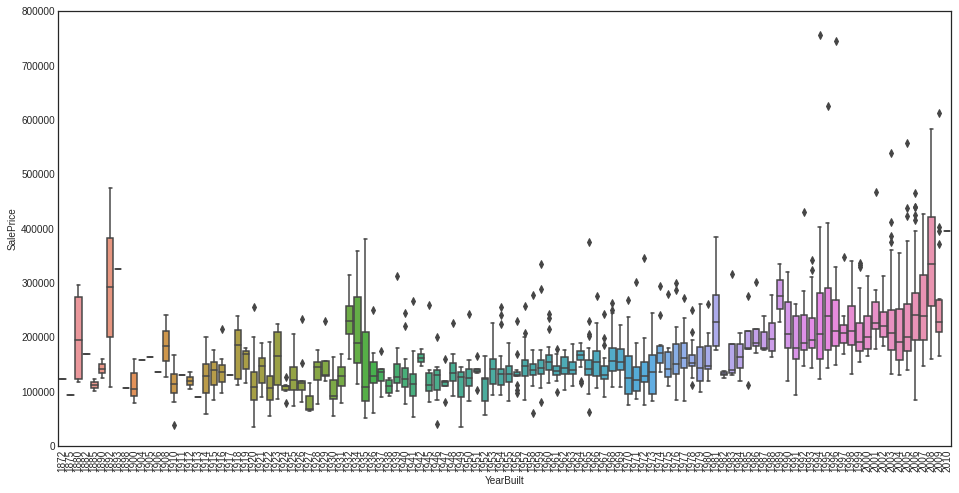

In [ ]:
var = 'YearBuilt'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

* `GrLivArea` and `TotalBsmtSF` seem to be linearly related with `SalePrice`. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of `TotalBsmtSF`, we can see that the slope of the linear relationship is particularly high.
* `OverallQual` and `YearBuilt` also seem to be related with `SalePrice`. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.

### Correlation matrix (heatmap style)

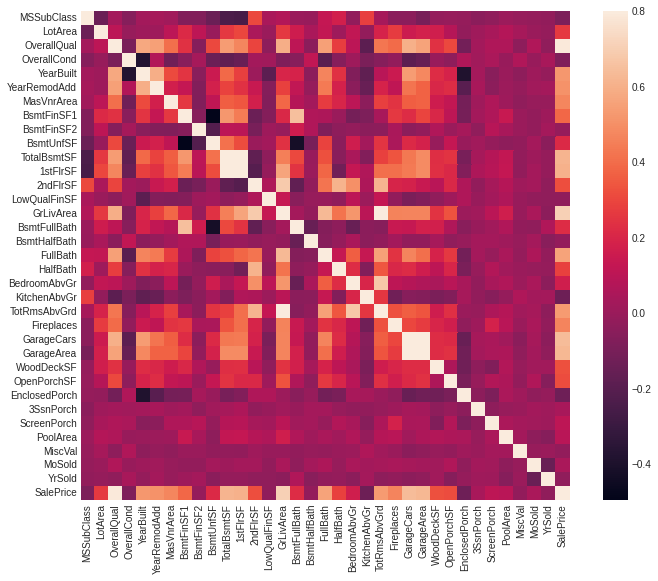

In [ ]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Heatmap is the best way to get a quick overview of our 'plasma soup' and its relationships. (Thank you @seaborn!)

At first sight, there are two red colored squares that get my attention. The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables, and the second one refers to the 'GarageX' variables. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. Heatmaps are great to detect this kind of situations and in problems dominated by feature selection, like ours, they are an essential tool.

Another thing that got my attention was the 'SalePrice' correlations. We can see our well-known 'GrLivArea', 'TotalBsmtSF', and 'OverallQual' saying a big 'Hi!', but we can also see many other variables that should be taken into account. That's what we will do next.

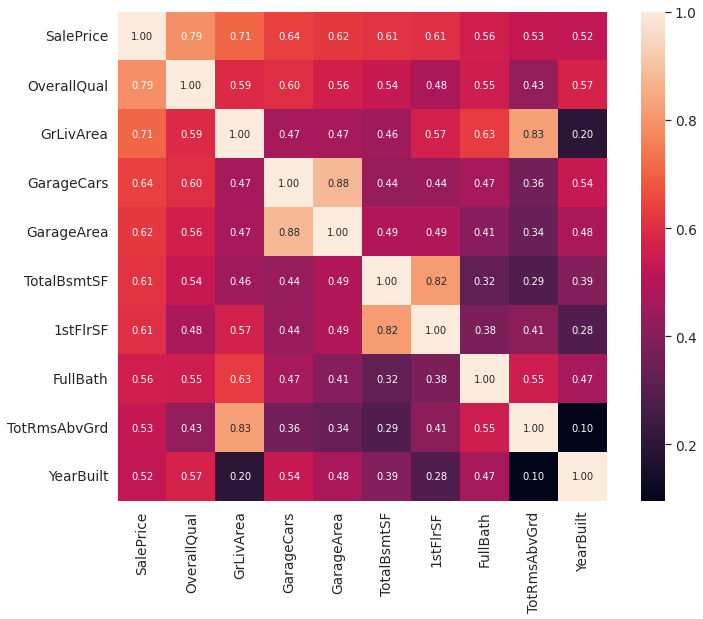

In [ ]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values);

According to our crystal ball, these are the variables most correlated with 'SalePrice'. My thoughts on this:

* 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. Check!
* 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, as we discussed in the last sub-point, the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
* 'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' just to say that our first guess was right (re-read 'So... What can we expect?').
* 'FullBath'?? Really?
* 'TotRmsAbvGrd' and 'GrLivArea', twin brothers again.

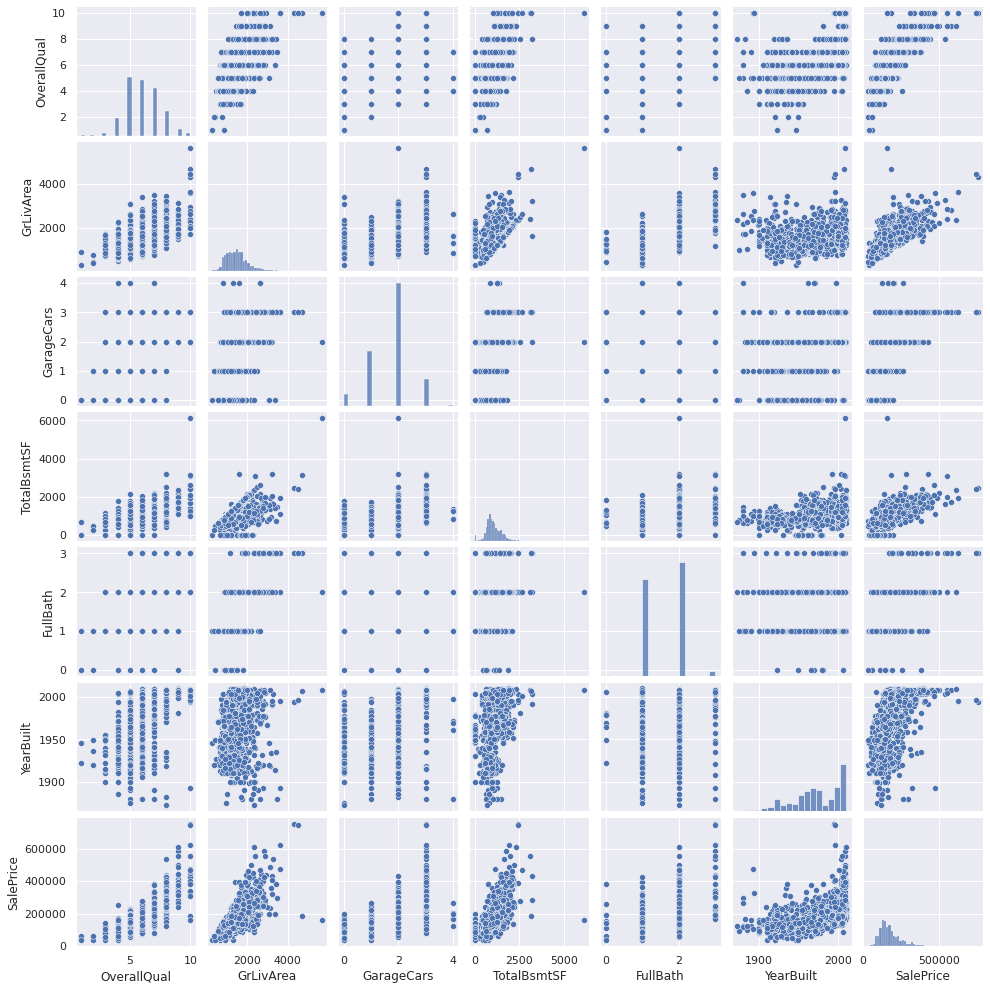

In [ ]:
#scatterplot
sns.set()
cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'SalePrice']
sns.pairplot(df[cols], height = 2);

Although we already know some of the main figures, this mega scatter plot gives us a reasonable idea about variables relationships.

One of the figures we may find interesting is the one between 'TotalBsmtSF' and 'GrLiveArea'. In this figure we can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area (unless you're trying to buy a bunker).

## Summaries

In [ ]:
def rounded_avg(x):
    return round(x.mean(), -2)
bed_vs_garage = df.groupby(['BedroomAbvGr','GarageCars'])['SalePrice'].apply(rounded_avg).unstack()
bed_vs_garage
# equivalent to pivot_table() but with more flexibility
# df.pivot_table(index='BedroomAbvGr', columns='GarageCars', values='SalePrice', aggfunc='mean')

GarageCars,0,1,2,3,4
BedroomAbvGr,,,,,
0,NaN,145000.0,199700.0,385000.0,NaN
1,74600.0,86500.0,183800.0,354500.0,NaN
2,83700.0,117100.0,171400.0,329900.0,206300.0
3,110100.0,132100.0,183800.0,290100.0,145500.0
4,125000.0,145900.0,206900.0,335200.0,266000.0
5,115000.0,133400.0,192500.0,267000.0,NaN
6,138400.0,119000.0,136900.0,NaN,200000.0
8,200000.0,NaN,NaN,NaN,NaN


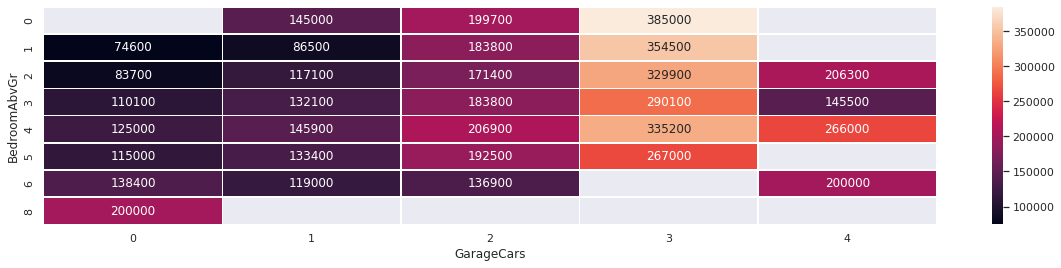

In [ ]:
plt.figure(figsize=(20, 4))
sns.heatmap(bed_vs_garage, cbar=True, annot=True, square=False, fmt='.0f', linewidths=.5);

### Dummy variables
Let's convert our categorical variables to dummy variables and prepare them for the machine learning.

In [ ]:
#convert categorical variable into dummy
house = pd.get_dummies(df, drop_first=True)

In [ ]:
house.head(3)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,...,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_P,PavedDrive_Y,Fence_Yes,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
house.shape

(1459, 195)

Feature matrix

In [ ]:
X = house.drop('SalePrice', axis=1)
X.shape

(1459, 194)

Target vector

In [ ]:
y = house['SalePrice']
y.shape

(1459,)

In [ ]:
# train/test split 
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=780)

print("Xtrain shape:", Xtrain.shape)
print("Xtest shape:", Xtest.shape)

Xtrain shape: (1021, 194)
Xtest shape: (438, 194)


We will instantiate the model with all the default parameters:

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

Fit model to the training data:

In [ ]:
model.fit(Xtrain, ytrain);

### Predict
Collect the results on the test set, for later:

In [ ]:
test_results = {}
RMSEs = {}

test_results['sklearn_lr_model'] = model.predict(Xtest)

Performance:

In [ ]:
from sklearn.metrics import mean_squared_error

RMSEs['sklearn_lr_model'] = round(mean_squared_error(ytest, test_results['sklearn_lr_model'], squared=False), 0)
RMSEs['sklearn_lr_model']

31257.0

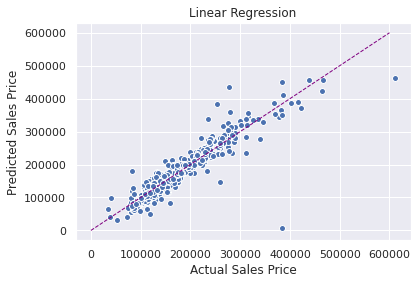

In [ ]:
ax = plt.scatter(ytest, 
            test_results['sklearn_lr_model'].reshape(test_results['sklearn_lr_model'].shape[0],),
            edgecolors='white')
plt.xlabel('Actual Sales Price')
plt.ylabel('Predicted Sales Price')
plt.title('Linear Regression')
plt.plot([0, 600000], [0, 600000], linewidth=1, c='purple', linestyle='--');

## How good is this model?

Let's create a simplistic model and compare our predictions with that.

We will assume the sales price would be the average of sales price from the train set for given number of living rooms and garage spaces:

In [ ]:
train_df = Xtrain.join(ytrain)

In [ ]:
simple_model = train_df.groupby(['BedroomAbvGr'])['SalePrice'].mean().reset_index()
simple_model.columns = ['BedroomAbvGr', 'simple_SalePrice']
simple_model

,BedroomAbvGr,simple_SalePrice
0,0,215500.000000
1,1,160648.108108
2,2,157739.539095
3,3,181322.437168
4,4,225583.269737
5,5,173041.176471
6,6,148975.000000
7,8,200000.000000


Now let's merge this with the test dataset -- **a one-to-many join**:

In [ ]:
test_results['simple_avg_model'] = Xtest.merge(simple_model, how='left', on=['BedroomAbvGr'])['simple_SalePrice']
RMSEs['simple_avg_model'] = round(mean_squared_error(ytest, test_results['simple_avg_model'], squared=False), 0)
RMSEs['simple_avg_model']

72606.0

In [ ]:
ytest.describe()

count       438.000000
mean     179904.849315
std       73741.834629
min       34900.000000
25%      130125.000000
50%      164600.000000
75%      215000.000000
max      611657.000000
Name: SalePrice, dtype: float64

In [ ]:
Xtest.shape

(438, 194)

Clearly our regression model is doing better than this simple modoel. But there is a lot of room for improvement. Optimizing the model, feature engineering, and feature selection are some methods that can be used to improve the results. Since they are all beyond the scope of this course we leave them to the motivated readers.

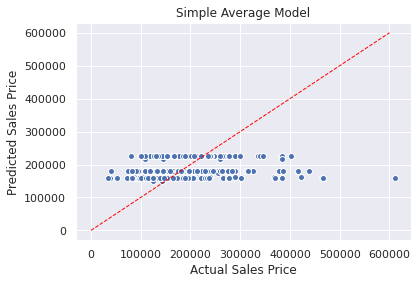

In [ ]:
ax = plt.scatter(ytest, 
            test_results['simple_avg_model'],
            edgecolors='white')
plt.xlabel('Actual Sales Price')
plt.ylabel('Predicted Sales Price')
plt.title('Simple Average Model')
plt.plot([0, 600000], [0, 600000], linewidth=1, c='red', linestyle='--');

# Neural Networks
Let's do some basic modeling using neural networks and deep learning.

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.6.0


It is good practice to normalize features that use different scales and ranges. For the sake of brevity, we will skip this in this exercise.

One reason this is important is because the features are multiplied by the model weights. So the scale of the outputs and the scale of the gradients are affected by the scale of the inputs.

Although a model might converge without feature normalization, normalization makes training much more stable.

### Linear regression
Before building a DNN model, start with a linear regression.

Training a model with tf.keras typically starts by defining the model architecture.

In this case use a `keras.Sequential` model. This model represents a sequence of steps. In this case there is one step:

* Apply a linear transformation ($y = mx + b$) to produce 1 output using layers.Dense.

The number of inputs can either be set by the `input_shape` argument, or automatically when the model is run for the first time.


Build the sequential model:

In [ ]:
linear_model = tf.keras.Sequential([
    layers.Dense(units=1, input_shape=[Xtrain.shape[-1],])
])

linear_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 195       
Total params: 195
Trainable params: 195
Non-trainable params: 0
_________________________________________________________________


Once the model is built, configure the training procedure using the Model.compile() method. The most important arguments to compile are the loss and the optimizer since these define what will be optimized (mean_absolute_error) and how (using the optimizers.Adam).

In [ ]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

Once the training is configured, use `Model.fit()` to execute the training:

In [ ]:
%%time
history = linear_model.fit(
    Xtrain, ytrain,
    epochs=100,
    verbose=0, # suppress logging
    validation_split = 0.2) # Calculate validation results on 20% of the training data

CPU times: user 5.51 s, sys: 402 ms, total: 5.91 s
Wall time: 4.94 s


Visualize the model's training progress using the stats stored in the history object.

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,27830.941406,27540.560547,95
96,27965.632812,27759.412109,96
97,27918.212891,27656.892578,97
98,27684.474609,27576.951172,98
99,27866.125000,27559.263672,99


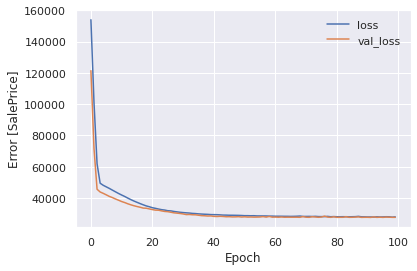

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [SalePrice]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [ ]:
test_results['linear_nn_model'] = linear_model.predict(Xtest, verbose=0)
RMSEs['linear_nn_model'] = round(mean_squared_error(ytest, test_results['linear_nn_model'], squared=False), 0)
RMSEs['linear_nn_model']

36184.0

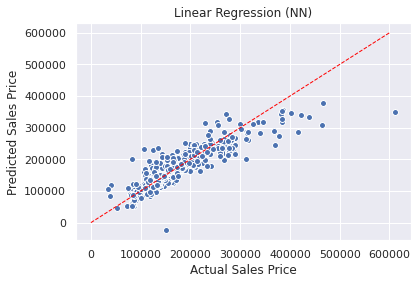

In [ ]:
ax = plt.scatter(ytest, 
            test_results['linear_nn_model'].reshape(test_results['linear_nn_model'].shape[0],),
            edgecolors='white')
plt.xlabel('Actual Sales Price')
plt.ylabel('Predicted Sales Price')
plt.title('Linear Regression (NN)')
plt.plot([0, 600000], [0, 600000], linewidth=1, c='red', linestyle='--');

## A DNN regression

<img src="https://github.com/soltaniehha/Intro-to-Data-Analytics/blob/main/figs/dnn.png?raw=true" width="600" align="center"/>

This section implements multiple-input DNN models. The code is basically the same except the model is expanded to include some "hidden" non-linear layers. The name "hidden" here just means not directly connected to the inputs or outputs.

The model will contain a few more layers than the linear model:

* Two hidden, nonlinear, Dense layers using the relu nonlinearity.
* A linear single-output layer.


In [ ]:
dnn_model = keras.Sequential([
      layers.Dense(64, activation='relu', input_shape=[Xtrain.shape[-1],]),
      layers.Dropout(0.2),
      layers.Dense(64, activation='relu'),
      layers.Dropout(0.2),
      layers.Dense(1)
  ])

dnn_model.compile(loss='mean_absolute_error',
                  optimizer=tf.keras.optimizers.Adam(0.001))

In [ ]:
%%time
history = dnn_model.fit(
    Xtrain, ytrain,
    epochs=1000,
    verbose=0, # suppress logging
    validation_split = 0.2) # Calculate validation results on 20% of the training data

CPU times: user 1min 3s, sys: 4.88 s, total: 1min 8s
Wall time: 52.1 s


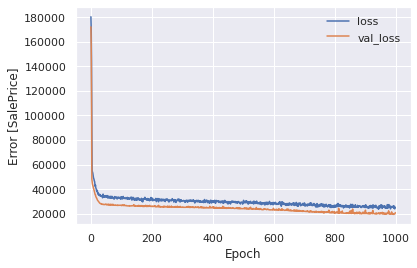

In [ ]:
plot_loss(history)

In [ ]:
test_results['dnn_model'] = dnn_model.predict(Xtest, verbose=0)
RMSEs['dnn_model'] = round(mean_squared_error(ytest, test_results['dnn_model'], squared=False), 0)
RMSEs['dnn_model']

28002.0

In [ ]:
RMSEs

{'dnn_model': 28002.0,
 'linear_nn_model': 36184.0,
 'simple_avg_model': 72606.0,
 'sklearn_lr_model': 31257.0}

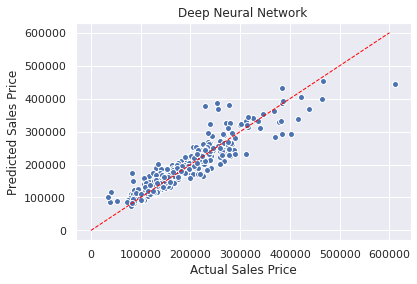

In [ ]:
ax = plt.scatter(ytest, 
            test_results['dnn_model'].reshape(test_results['dnn_model'].shape[0],),
            edgecolors='white')
plt.xlabel('Actual Sales Price')
plt.ylabel('Predicted Sales Price')
plt.title('Deep Neural Network')
plt.plot([0, 600000], [0, 600000], linewidth=1, c='red', linestyle='--');